In [1]:
from IPython.display import Image

# <a id="1.Summary"> 1.Summary</a>

I have attached a spreadsheet containing five years of production and weather data for our Middlesex, NJ and Bethlehem, PA facilities. When looking at the production data if the “BatchNumber” listed starts with PASD it was done in Bethlehem and if it starts with NJSD it was done in Middlesex. I included some info that we have on flowability and hygroscopicity but it’s not empirical data; mostly a judgement call made for “reasons”. Weather data was downloaded from openweathermap.org, temperatures are in °F. Let me know if you need any clarification on the data provided.


More specifically, given the dependence of their drying products and services on weather
conditions, the company is interested in using weather data to forecast the processing times for
different batches of SKUs. 

The team is expected to:

• Develop a database with manufacturing data that will be used to develop statistical
models

• Develop, manage and maintain statistical models, including but not limited to:

o Forecasting of processing times based on weather data

o Forecasting downtime and preventive maintenance issues

<br>

<br>

<br>

# <a id="2.Table of Contents">2.Tabole of Contents</a>
<a href="#1.Summary">Click this Link back to Top</a>

<ol>
    <li><a href="#1.Summary">Summary</a></li>
    <li><a href="#2.Tabole of Contents">Tabole of Contents</a></li>
    <li><a href="#3.Preprocess">Preprocess</a>
    <ul>
        <li><a href="#3.1 Hyperparameter">3.1 Hyperparameter</a></li>
        <li><a href="#3.2 Import Data">3.2 Import Data</a></li>
        <li><a href="#3.3 EDA">3.3 EDA</a></li> 
        <li><a href="#3.4 Preprocess">3.4 Preprocess</a></li> 
        <li><a href="#3.5 Join Data">3.5 Join Data</a></li>  
        <li><a href="#3.6 EDA">3.6 EDA</a></li>  
    </ul>
    </li>
    <li><a href="#4.Others">Others</a>
    <ul>
        <li><del><a href="#TFIDF">4.1 TFIDF</a></del></li>
        <li><del><a href="#Embedding">4.2 Embedding</a></del></li> 
    </ul>
    </li>
    <li><a href="#5.Classify">Classify</a></li>
    <li><a href="#6.Models">Models</a>
    <ul>
        <li><a href="#6.1 Model1">6.1 Model1</a></li>
        <li><a href="#6.2 Model2">6.2 Model2</a></li>
    </ul>
    </li>
    <li><a href="#7.Analysis and Plot">Analysis and Plot</a></li>
    <ul>
        <li><a href="#7.1 Analysis">7.1 Analysis</a></li>
        <li><a href="7.2 Spearmanr">7.2 Spearmanr</a></li>
    </ul>
    <li><a href="#8.Main Function">Main Function</a></li>
    <li><a href="#9.Test Code">Test Code</a></li>
</ol>

<br>

<br>

<br>

# <a id="3.Preprocess">3.Preprocess</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

1. transform data column into identical format
2. split data into two station part: NJ and PA
3. 

## <a id="3.1 Hyperparameter">3.1 Hyperparameter</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [2]:
class HyperParamters(object):
    """
    This class will be used to transmit hyperparameters between class.parameters
    Most of class can inherit this class and its hyperparameters

    ########################__Rules__##################################
    class file name = class + _ + number of sequence + function name
    class name = ClassType (Camel-Case)
    function name = function_name
    variable name = attribute_type_describe (Hungarian notation) # sometime I don't use attribute
    constant = UPPERCASE
    ###########################################################################


    ########################__Notation__############################################
    1. We might need split data into two place NJ and PA, but we also can try to merge two location into one,
    because they are not far away
    2. clean data, transform date format, join by date, Coeffience anaylsis
    3. Check kaggle format
    4. Check journals
    5. Traditional way is to find relationship between total running time with other weather features
    6. But we need to consider equipment service lift or depreciation will affect running time
    7. Sometimes, we don't use running time itself, we can use the statiscal version of this data
    For example, runing time - avg , variance of each running time data point
    8.
    #############################################################################

    1.change import data path
    """

    def __init__(self):
        """:arg


        """
        self.TEST = 1

        # you can change this root path in this class and import_data() function will search from this root dictionary
        self.ROOTPATH = 'D:\\OneDrive\\03_Academic\\23_Github\\20_Stevens\\66-MGT-809-A\\03_data'

        # assign the column will be dropped in production table
        # we believe these columns are objective result or not useful features
        # ['Bulk Density'] is too objective
        # ['Moisture'] is decided by custome requirement, that might affect drying time
        # ['Hygroscopicity'] imbalance data distribution
        self.DROP_COL = ['Bulk Density', 'Moisture','Flow', 'Hygroscopicity']
        # we use z-score as our defination, If we set threshold as 3, the yeild great than 130% will be eliminate
        # we also have a np.abs() for smaller outliers, which also affected by this threshold
        self.YEILD_THRESHOLD = 3



<br>

<br>

<br>

## <a id="3.2 Import Data">3.2 Import Data</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [3]:
# from class_31_hyperparameters import HyperParamters

# read xlxs file
import pandas as pd
# record running data
from time import time
# join directory path
import os




class ImportData(HyperParamters):
    """
    Contain two method: import data and convert time


    """
    def __init__(self):
        # inhereit from HyperParameter
        HyperParamters.__init__(self)


    def import_data(self):
        """:arg

        Returns:
        ----------
        df_product:DataFrame
            real production data including running time
        df_nj_weather:DataFrame
            Middlesex, NJ factory weather data from openweather.org
        df_pa_weather:DataFrame


        """
        print("*" * 50, "Start import_data()", "*" * 50)
        start_time = time()

        # create excel full paht directory
        excel_product = os.path.join(self.ROOTPATH, '019_20160101_20201231_ProductionData.xlsx')
        # first sheet is real production data
        df_product = pd.read_excel(excel_product, sheet_name = '20160101_20201231_ProductionDat')
        # second sheet is NJ weather data
        df_nj_weather = pd.read_excel(excel_product, sheet_name = 'MiddlesexWeather')
        # third sheet is PA weather data
        df_pa_weather = pd.read_excel(excel_product, sheet_name = 'BethlehemWeather')
        # this new data missing rate, so we have to import old data and merge ['Rate'] to our new data
        old_product = os.path.join(self.ROOTPATH, '017_20160101_20201231_ProductionData.xlsx')
        df_old = pd.read_excel(old_product, sheet_name = '20160101_20201231_ProductionDat')
        df_product['Rate'] = df_old['Rate']

        # save
        df_product.to_csv('03_data/20_production.csv',index=False)
        df_nj_weather.to_csv('03_data/21_nj_weather.csv', index=False)
        df_pa_weather.to_csv('03_data/22_pa_weather.csv', index=False)

        cost_time = round((time() - start_time), 4)
        print("*" * 40, "End import_data() with {} second".format(cost_time), "*" * 40, end='\n\n')

        return df_product, df_nj_weather, df_pa_weather

    def read_csv(self):
        """":arg
        Because reading excel is too slow, so we use this function to read csv that processed and saved by
        import_data() function.
        """
        df_product = pd.read_csv('03_data/20_production.csv')
        df_nj_weather = pd.read_csv('03_data/21_nj_weather.csv')
        df_pa_weather = pd.read_csv('03_data/22_pa_weather.csv')


        return df_product, df_nj_weather, df_pa_weather



<br>

<br>

<br>

## <a id="3.3 EDA">3.3 EDA</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [4]:
# from class_31_hyperparameters import HyperParamters

# used for visulazation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class EDA(HyperParamters):
    """:arg
    """
    def __init__(self):
        """:arg
        """
        HyperParamters.__init__(self)

    def missing_plot(self, df: pd.DataFrame):
        """:arg

        Used for missing data plot for count plot and percenatage plot
        """
        # not all columns contain missing value, we only plot the colunms have missing value
        # checking is there any missing value in this df and find threir column names and assign to col_missing_value
        col_missing_value = list(df.columns[df.isnull().any()])
        # count the missing value for each column
        df[col_missing_value].isnull().sum()
        # to hold the columns names
        list_labels=[]
        # to hold the count of missing values for each variable
        list_value_count=[]
        # to hold the percentage of missing values for each variable
        list_percent_count=[]
        #
        for col in col_missing_value:
            # add the column names into this list
            list_labels.append(col)
            # caculate each column missing value count and append to list
            list_value_count.append(df[col].isnull().sum())
            # df.shape[0] will give totoal row count
            list_percent_count.append(df[col].isnull().sum()/df.shape[0])


        # create two subplot with 1 row two columns
        fig, (ax1, ax2) = plt.subplots(1,2)
        # we use ax.barh() create horizontal bar chart, bar width is the count number of missing value
        ax1.barh(y = np.arange(len(list_labels)),width = np.array(list_value_count), height=0.5, color='blue')
        # set lenght of y labels
        ax1.set_yticks(np.arange(len(list_labels)))
        # set y labels
        ax1.set_yticklabels(list_labels, rotation='horizontal')
        ax1.set_xlabel('Count of missing values')
        ax1.set_title("Columns with missing value count")

        ax2.barh(y=np.arange(len(list_labels)), width = np.array(list_percent_count), height=0.5, color='red')
        ax2.set_yticks(np.arange(len(list_labels)))
        ax2.set_yticklabels(list_labels, rotation='horizontal')
        ax2.set_xlabel("Percentage of missing values")
        ax2.set_title("Columns with missing values")

        plt.show()
        # print(col_missing_value, type(col_missing_value))

        return col_missing_value


<br>

<br>

<br>

## <a id="3.4 Preprocess">3.4 Preprocess</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [5]:
# from class_31_hyperparameters import HyperParamters
# from class_33_eda import EDA

# using for timestap convert
import pandas as pd
import numpy as np
from scipy import stats
# recording running time in each function
from time import time



class PreProcess(HyperParamters):
    """:arg
    Actually, not only production data need to be clean.

    tz_convert(): used to convert string to timestamp format
    """

    def __init__(self):
        """:arg
        Inheriret from HyperParamters
        """
        HyperParamters.__init__(self)


    def tz_convert(self, series):
        """:arg
        Args:
        ------
        serise:DataFrame.series
            each element from DataFrame columns

        Returns:
        -----------
        series_est:timestamp

        """
        series_est = pd.Timestamp(series, unit='s', tz='America/New_York')

        return series_est

    def round_to_hour(self,timestamp):
        """
        We notice df_product['StartDat'] is string type not DataFrame.timestamp.
        And weather data are seperated by hours, so we need transform string time data round to nearest hour

        Args:
        --------
        timestamp
        """
        # due to excel convert to csv, all format are lost and original timestamp has transformed to 'string'
        # so we add a duplicate process to convert 'string' to 'timestamp'
        timestamp = pd.Timestamp(timestamp)
        # because of summer time and winter time rules, some UTC date can't conver to EST
        try:
            date_hour = timestamp.round(freq='H').tz_localize(tz='America/New_York', nonexistent='shift_forward')
        except:
            print('This data cant convert correctly {}'.format(timestamp.round(freq='H')))
            date_hour = timestamp.round(freq='H').tz_localize(tz='America/New_York',
                                                              ambiguous='NaT',
                                                              nonexistent='shift_forward')
            print('This date replaced by {}'.format('NaT'))

        return date_hour

    def drop_na(self, df, list_col):
        """
        Args:
        ------
        df:DataFrame
            The DF has delete some objective columns
        list_col:list
            Generated by EDA() part, like['dt_est','Rate']

        Returns:
        --------
        df_clean:DataFrame
            complete cleaning
        df_dropped:DataFrame
            Contain the rows have been dropped by dropna()
        """
        # sometime, we also need review these columns that has been deleted by rows, so we restore them
        df_dropped = df[df.isnull().any(axis=1)]
        # according to eda result, we got columns name that has missing values
        df_clean = df.dropna(subset=list_col)
        print("These {} columns still have missing data".format(list_col))
        print("After dropping na, {} rows has decreased to {} rows".format(df.shape[0], df_clean.shape[0]))

        return df_clean, df_dropped


    def del_outlier(self, df, str_col, abs=False):
        """
        We use z-score to delete outliers in our data. for example ['YieldPrecentage'] and ['Rate']
        When ads=True, it will delete smallest and biggest outliers.
        When ads=False, it will only delete outliers ['YieldPercentage']> 130%, which means remain [0,130]

        Args:
        ------
        df:DataFrame
            Any dataframe
        str_col:str
            the name of column you want to detect outliers and drop

        Returns:
        --------
        df_clean:DataFrame
            df has been dropped
        df_outlier:DataFrame
            The rows that has been detected as outliers
        """
        if abs:
            # if abs=True, we will absolute z-score and find the both side outliers
            z_score = np.abs(stats.zscore(df[str_col], nan_policy='omit'))
            print("We will drop too large and too small outliers")
        else:
            # if abs=False (default setting), we only delete the too large outlers
            z_score = stats.zscore(df[str_col], nan_policy='omit')
            print("we will only drop too large outliers")
        # set a z-score threshold, any greater than this value will be eliminate
        # z_threshold = 3
        # filter that ooutlier rows in dataframe
        # index_outlier = np.where(z_score > z_threshold, z_score)
        # get the index of these outliers
        index_outlier = df[z_score > self.YEILD_THRESHOLD].index
        # restore these outliers in df_outlier for further review
        df_outlier = df.loc[index_outlier]
        print('We have {} data points are outliers, which between {} and {}'.format(len(index_outlier),
                                                                                    df_outlier[str_col].min(),
                                                                                    df_outlier[str_col].max()))
        # drop these rows by index
        df_clean = df.drop(axis=0, index=index_outlier)
        print("After drop outlier, the {} column remain range between {} and {}".format(str_col,
                                                                                        df_clean[str_col].min(),
                                                                                        df_clean[str_col].max()))
        return df_clean, df_outlier


    def clean_data(self, df_product, df_nj_weather, df_pa_weather):
        """:arg
        Delete columns we believe didn't use in the future.

        Args:
        --------
        df_product:DataFrame

        Returns:
        --------
        df_product:DataFrame
            droped missing value, add a new column['dt_est'] for merge purpose
        df_nj_weather:DataFrame
            cleaned DataFrame table

        """
        print("*" * 50, "Start clean_data()", "*" * 50)
        start_time = time()

        class_eda = EDA()
        #***************Drop non-realted columns**********************
        # *************Drop by columns**************
        # ['Bulk Density'] have 50% missing data
        df_product = df_product.drop(self.DROP_COL, axis=1)
        print("These columns have been dropped {}".format(self.DROP_COL))
        # some weather data might also need clearn
        list_missing_nj = class_eda.missing_plot(df_nj_weather)
        df_nj_weather = df_nj_weather.drop(list_missing_nj, axis = 1)
        list_missing_pa = class_eda.missing_plot(df_pa_weather)
        df_pa_weather = df_pa_weather.drop(list_missing_pa, axis = 1)
        #******************End************************************


        #**************Convert all time into same timestamp format***************************
        # convert weather data ['dt'] (unix time) to Eastern Stardard Time(EST)
        # pass an argument(series) to function tz_convert()
        df_nj_weather['dt_est'] = df_nj_weather['dt'].apply(self.tz_convert)
        # another way to use apply()
        # df_nj_weather['dt_est'] = df_nj_weather['dt'].apply(lambda x: pd.TimeStamp(x, unit='s', tz='America/New_York'))
        df_pa_weather['dt_est'] = df_pa_weather['dt'].apply(self.tz_convert)
        # for merge purpose, make sure two column have same name
        df_product['dt_est'] = df_product['StartDate'].apply(self.round_to_hour)
        #***********************End***************************************************

        #*************Drop missing data********************************
        list_col_missing_product = class_eda.missing_plot(df_product)
        #**************Drop by rows**********************
        # we get the name of columns that has missing value from eda part
        df_product,df_dropped = self.drop_na(df_product, list_col_missing_product)
        #******************End*****************


        #*****************Drop by outliers****************
        # after drop non-related columns, convert timestamp format, drop missing data by rows,
        # we need to drop outliers in some necessary columns
        # we might need automate generate outlier by some EDA() models
        str_col='YieldPercentage'
        df_product, df_outlier = self.del_outlier(df_product, str_col, abs=False)





        cost_time = round((time() - start_time), 4)
        print("*" * 40, "End clean_data() with {} second".format(cost_time), "*" * 40, end='\n\n')

        return df_product, df_nj_weather, df_pa_weather, df_dropped, df_outlier



<br>

<br>

<br>

## <a id="3.5 Merge Data">3.5 Merge Data</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [13]:
# from class_31_hyperparameters import HyperParamters

import pandas as pd
import numpy as np
# for time sum()
import datetime

class MergeData(HyperParamters):
    """:arg
    For now, we have differenty hypothesis to view our data
    We will use self.MERGE_WAY to choose different hypothesis

    1.self.MERGE_WAY:one
        without further process, just using dt_est to merge
    2.self.MERGE_WAY:

    """
    def __init__(self):
        HyperParamters.__init__(self)

    def convert_timedelta(self, element):
        """:arg
        """
        time_delta = datetime.timedelta(hours = element)
        return time_delta


    def row_proliferate(self, df_product):
        """:arg
        Because weather data is split by hour, so we need transform each records into every hour records
        """
        # first create a new column ['hours'] from ['DryingTime_Hrs'] round to bigger integer
        df_product['hours'] = np.ceil(df_product['DryingTime_Hrs']).astype(int)
        # Second, repeat each records/rows by ['hours'] times
        # which means you will have how many running hours, you will have how many rows for each column
        df_multi = pd.DataFrame(np.repeat(df_product.values, df_product['hours'], axis=0),
                                      columns = df_product.columns)
        # Thrid, adjust ['hours'] to ascending rank model, for instance, [3,3,3] to [0,1,2]
        # this is used for next step add to ['dt_est'] time
        # groupby each old record, for instance, for first records, groupby will be a three row table
        # for second records, groupby['StartData'] will be a nine row table
        # Then, extract ['hours'] column, for each pd.Series, apply a fomulation
        # addition, in here, ['hours'] will not be a single row, instead, it will be a three element Series
        # for this three/nine series, we cacualte their cumulation sum cumsum() [3,3,3] will be [3,6,9]
        # for instance [9.9.9.9...9] will be [9,18,27,,,,81]
        # and we divide by ['hours'] count, which will be [3,9,...], last minute 1 to get a column for timestamp add
        df_multi['hour_add'] = df_multi.groupby(['StartDate'])['hours'].apply(lambda x:x.cumsum()/x.count())-1
        # our weather segmentation is one hour
        # one_hour = datetime.timedelta(hours = 1)
        df_multi['hour_add'] = df_multi['hour_add'].apply(self.convert_timedelta)
        df_multi['dt_est'] = df_multi['dt_est'] + df_multi['hour_add']

        return df_multi



    def merge_location(self, df_product, df_nj_weather, df_pa_weather):
        """:arg
        split by location, just merge all together by ['dt_est']
        """
        # Identify location by ['Batchnumber']
        df_nj_pro = df_product[df_product['BatchNumber'].str.contains('NJ', regex=False)]
        # them merge them into a new DataFrame
        df_nj = pd.merge(df_nj_pro, df_nj_weather, how='left', on=['dt_est'])
        df_pa_pro = df_product[df_product['BatchNumber'].str.contains('PA', regex=False)]
        df_pa = pd.merge(df_pa_pro, df_pa_weather, how='left', on=['dt_est'])

        return df_nj, df_pa



# <a id="4.others">4.Others</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

# <a id="7.Main Function">7.Main Function</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

************************************************** Start clean_data() **************************************************
These columns have been dropped ['Bulk Density', 'Moisture', 'Flow', 'Hygroscopicity']


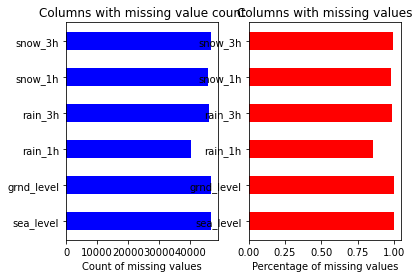

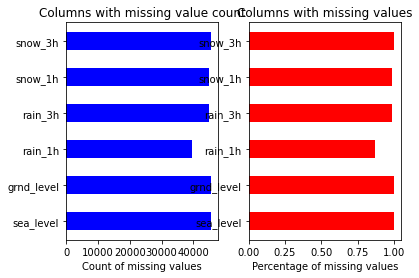

This data cant convert correctly 2016-11-06 01:00:00
This date replaced by NaT
This data cant convert correctly 2017-11-05 01:00:00
This date replaced by NaT


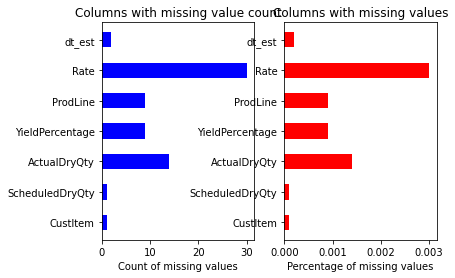

These ['CustItem', 'ScheduledDryQty', 'ActualDryQty', 'YieldPercentage', 'ProdLine', 'Rate', 'dt_est'] columns still have missing data
After dropping na, 9970 rows has decreased to 9931 rows
we will only drop too large outliers
We have 15 data points are outliers, which between 136.0 and 864.9
After drop outlier, the YieldPercentage column remain range between 0.0 and 130.0
**************************************** End clean_data() with 4.5792 second ****************************************

OVER


In [15]:
# from class_31_hyperparameters import HyperParamters
# from class_32_import_data import ImportData
# from class_34_preprocess import PreProcess
# from class_33_eda import EDA
# from class_35_merge_data import MergeData

def main():
    """
    We use this function to call process one by one.
    """


    # ***********************import******************************
    class_import = ImportData()
    # df_product, df_nj_weather, df_pa_weather = class_import.import_data()
    df_product, df_nj_weather, df_pa_weather = class_import.read_csv()

    # *******************3.Preprocess**************************************
    class_pre = PreProcess()
    df_product, df_nj_weather, df_pa_weather, df_dropped, df_outlier = class_pre.clean_data(df_product,
                                                                                df_nj_weather,
                                                                                df_pa_weather)

    #*******************3.5 MergeDate************************
    class_merge = MergeData()
    df_nj, df_pa = class_merge.merge_location(df_product, df_nj_weather, df_pa_weather)
    df_multi = class_merge.row_proliferate(df_product)

    return (df_product, df_nj_weather, df_pa_weather, df_dropped, df_outlier,
            df_nj, df_pa, df_multi)



if __name__=="__main__":
    """:arg
    
    """
    (df_product, df_nj_weather, df_pa_weather, df_dropped, df_outlier,
     df_nj, df_pa, df_multi) = main()

    print("OVER")

# <a id="9.Test Code">9.Test Code</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

1. We might need split data into two place NJ and PA, but we also can try to merge two location into one, because they are not far away
2. clean data, transform date format, join by date, Coeffience anaylsis
3. Check kaggle format
4. Check journals 

In [107]:
df_nj.columns

Index(['StartDate', 'BatchNumber', 'CustItem', 'Dryer', 'ScheduledDryQty',
       'ActualDryQty', 'YieldPercentage', 'DryingTime_Hrs', 'CleanTime_Hrs',
       'DownTime_Hrs', 'TotalRunTime_Hrs', 'ProdLine', 'Rate', 'dt_est', 'dt',
       'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

<AxesSubplot:>

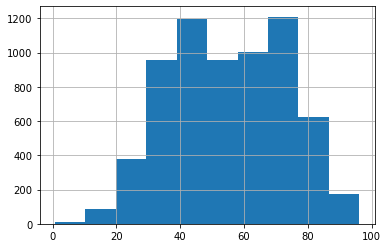

In [121]:
df_nj['temp'].hist()

<AxesSubplot:>

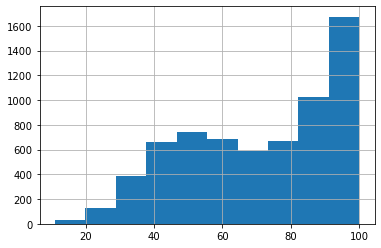

In [122]:
df_nj['humidity'].hist()

In [123]:
df_nj_weather

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,dt_est
0,1451606400,2016-01-01 00:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,43.93,37.06,42.80,46.30,1019,62,5.82,280,75,803,Clouds,broken clouds,04n,2015-12-31 19:00:00-05:00
1,1451610000,2016-01-01 01:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,43.65,38.10,42.80,46.02,1020,62,3.36,0,90,804,Clouds,overcast clouds,04n,2015-12-31 20:00:00-05:00
2,1451613600,2016-01-01 02:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,43.27,36.12,42.80,45.11,1020,59,5.82,300,90,804,Clouds,overcast clouds,04n,2015-12-31 21:00:00-05:00
3,1451617200,2016-01-01 03:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,42.62,36.14,42.08,44.20,1020,61,4.70,0,90,804,Clouds,overcast clouds,04n,2015-12-31 22:00:00-05:00
4,1451620800,2016-01-01 04:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,42.08,35.42,41.00,43.56,1020,59,4.70,290,90,804,Clouds,overcast clouds,04n,2015-12-31 23:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,1609441200,2020-12-31 19:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,43.36,34.21,41.00,45.00,1020,79,11.41,320,75,803,Clouds,broken clouds,04d,2020-12-31 14:00:00-05:00
46642,1609444800,2020-12-31 20:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,42.30,33.82,39.99,44.01,1021,60,8.05,310,90,500,Rain,light rain,10d,2020-12-31 15:00:00-05:00
46643,1609448400,2020-12-31 21:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,41.18,34.99,39.00,42.80,1023,70,4.70,360,90,804,Clouds,overcast clouds,04d,2020-12-31 16:00:00-05:00
46644,1609452000,2020-12-31 22:00:00 +0000 UTC,-18000,Middlesex,40.572603,-74.492654,40.30,35.24,37.99,42.07,1024,80,3.36,310,75,803,Clouds,broken clouds,04n,2020-12-31 17:00:00-05:00


D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

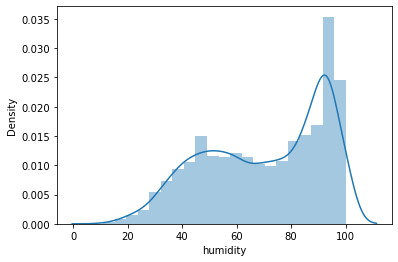

In [120]:
sns.distplot(df_nj['humidity'])

In [108]:
df_nj.groupby(['ProdLine'])['Dryer'].count()

ProdLine
Chemical          329
Cosmetic           47
Flavors          3505
Food Addit         61
Food Additive     193
Fragrance        2315
Nutraceutical      36
Pharma             39
Vitamin            66
Name: Dryer, dtype: int64

In [111]:
df_pa.groupby(['ProdLine'])['Dryer'].count()

ProdLine
Chemical          429
Cosmetic            7
Flavors          2103
Food Addit         67
Food Additive     321
Fragrance           1
Nutraceutical     664
Pharma             48
Vitamin           219
Name: Dryer, dtype: int64

In [115]:
df_pa.loc[df_pa['StartDate'].str.contains('2016')].groupby(['ProdLine'])['Dryer'].count()

ProdLine
Chemical         113
Flavors          234
Food Addit         7
Food Additive     23
Nutraceutical    164
Pharma            14
Vitamin           52
Name: Dryer, dtype: int64

In [116]:
df_pa.loc[df_pa['StartDate'].str.contains('2017')].groupby(['ProdLine'])['Dryer'].count()

ProdLine
Chemical         109
Flavors          217
Food Addit        28
Food Additive     33
Fragrance          1
Nutraceutical    155
Pharma             5
Vitamin           60
Name: Dryer, dtype: int64

In [117]:
df_pa.loc[df_pa['StartDate'].str.contains('2018')].groupby(['ProdLine'])['Dryer'].count()

ProdLine
Chemical          55
Flavors          421
Food Addit        14
Food Additive     69
Nutraceutical    174
Pharma            10
Vitamin           48
Name: Dryer, dtype: int64

In [119]:
df_pa.loc[df_pa['StartDate'].str.contains('2019')].groupby(['ProdLine'])['Dryer'].count()

ProdLine
Chemical          89
Cosmetic           4
Flavors          621
Food Addit        12
Food Additive     87
Nutraceutical    114
Pharma             7
Vitamin           24
Name: Dryer, dtype: int64

In [106]:
df_product[(df_product['DownTime_Hrs']<100)&(df_product['DownTime_Hrs']>50)].shape

(37, 15)

In [101]:
df_nj.iloc[0:4,0:13]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.7357,352.2000,105.5,2.4,5.1,0.0,7.5,Fragrance,146.750000
1,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.4120,3935.3999,92.2,8.4,0.2,4.2,12.8,Fragrance,468.499988
2,2016-01-02 21:40:51.470,NJSD313826,10447-0000,Dryer 04,1353.0969,1195.9000,88.4,9.7,5.7,0.9,16.2,Fragrance,123.288660
3,2016-01-02 22:45:11.673,NJSD312677,24164-0000,Dryer 02,19549.0975,18185.1000,93.0,54.2,11.1,7.6,72.8,Flavors,335.518450


In [102]:
df_multi.head(5)

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours,hour_add
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3,0 days 00:00:00
1,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 10:00:00-05:00,3,0 days 01:00:00
2,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 11:00:00-05:00,3,0 days 02:00:00
3,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 11:00:00-05:00,9,0 days 00:00:00
4,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,0 days 01:00:00


In [125]:
df_multi['dt_est']

0        2016-01-02 09:00:00-05:00
1        2016-01-02 10:00:00-05:00
2        2016-01-02 11:00:00-05:00
3        2016-01-02 11:00:00-05:00
4        2016-01-02 12:00:00-05:00
                    ...           
220782   2021-01-01 17:00:00-05:00
220783   2020-12-30 21:00:00-05:00
220784   2020-12-30 22:00:00-05:00
220785   2020-12-30 23:00:00-05:00
220786   2020-12-31 00:00:00-05:00
Name: dt_est, Length: 220787, dtype: datetime64[ns, America/New_York]

In [126]:
df_nj_weather['dt_est']

0       2015-12-31 19:00:00-05:00
1       2015-12-31 20:00:00-05:00
2       2015-12-31 21:00:00-05:00
3       2015-12-31 22:00:00-05:00
4       2015-12-31 23:00:00-05:00
                   ...           
46641   2020-12-31 14:00:00-05:00
46642   2020-12-31 15:00:00-05:00
46643   2020-12-31 16:00:00-05:00
46644   2020-12-31 17:00:00-05:00
46645   2020-12-31 18:00:00-05:00
Name: dt_est, Length: 46646, dtype: datetime64[ns, America/New_York]

In [127]:
df_multi.loc[df_multi['BatchNumber'].str.contains('NJ')]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours,hour_add
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3,0 days 00:00:00
1,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 10:00:00-05:00,3,0 days 01:00:00
2,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 11:00:00-05:00,3,0 days 02:00:00
3,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 11:00:00-05:00,9,0 days 00:00:00
4,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,0 days 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220660,2020-12-28 06:35:56.627,NJSD378095,10247-0000,Dryer 03,19073.2,18400,96.5,90.9,5.8,12.7,109.4,Food Additive,202.42,2021-01-01 01:00:00-05:00,91,3 days 18:00:00
220783,2020-12-30 20:55:10.457,NJSD379709,46248-0000,Dryer 04,717.535,696.2,97,3.4,2.9,1,7.3,Fragrance,204.765,2020-12-30 21:00:00-05:00,4,0 days 00:00:00
220784,2020-12-30 20:55:10.457,NJSD379709,46248-0000,Dryer 04,717.535,696.2,97,3.4,2.9,1,7.3,Fragrance,204.765,2020-12-30 22:00:00-05:00,4,0 days 01:00:00
220785,2020-12-30 20:55:10.457,NJSD379709,46248-0000,Dryer 04,717.535,696.2,97,3.4,2.9,1,7.3,Fragrance,204.765,2020-12-30 23:00:00-05:00,4,0 days 02:00:00


In [ ]:
df_multi.loc[df_multi['BatchNumber'].str.contains('NJ')]

In [145]:
df_product.loc[df_product['Rate']>2000]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours
2459,2017-05-31 14:55:09.420,PASD335907,40828-0000,Dryer 07,6079.9957,4958.9999,81.6,1.5,0.0,0.0,1.5,Nutraceutical,3305.999933,2017-05-31 15:00:00-04:00,2
7884,2020-01-10 09:16:44.370,PASD366223,44939-0000,Dryer 06,1940.0480,2246.4999,115.8,0.3,0.1,0.0,0.4,Chemical,7488.333000,2020-01-10 09:00:00-05:00,1
7916,2020-01-16 16:15:35.970,PASD366522,47645-0000,Dryer 06,8580.0000,8450.0000,98.5,0.6,0.1,0.0,0.7,Flavors,14083.333333,2020-01-16 16:00:00-05:00,1


In [146]:
df_product.loc[df_product['BatchNumber']=='PASD317476']

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours


In [148]:
df_dropped.loc[df_dropped['BatchNumber']=='PASD317476']

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est
449,2016-03-29 22:00:36.000,PASD317476,10185-0000,Dryer 08,5820.1387,6554.8998,112.6,0.1,0.0,0.0,0.1,NaN,65548.998,2016-03-29 22:00:00-04:00


In [89]:
df_nj.columns

Index(['StartDate', 'BatchNumber', 'CustItem', 'Dryer', 'ScheduledDryQty',
       'ActualDryQty', 'YieldPercentage', 'DryingTime_Hrs', 'CleanTime_Hrs',
       'DownTime_Hrs', 'TotalRunTime_Hrs', 'ProdLine', 'Rate', 'dt_est', 'dt',
       'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [91]:
df_20 = df_nj.loc[df_nj['Rate']<2000]

In [94]:
df_20.shape

(6591, 33)

In [93]:
df_nj.shape

(6591, 33)

In [95]:
df_21 = df_pa.loc[df_pa['Rate']<2000]

In [96]:
df_pa.shape

(3859, 33)

In [97]:
df_21.shape

(3856, 33)

D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rate', ylabel='Density'>

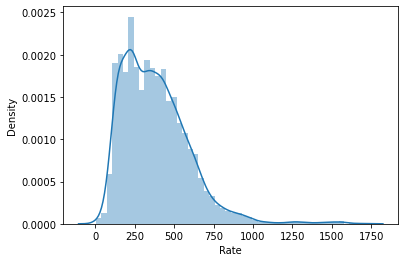

In [92]:
sns.distplot(df_20['Rate'])

<AxesSubplot:>

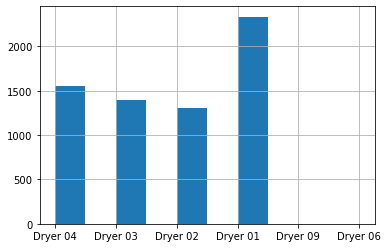

In [17]:
df_nj['Dryer'].hist()

<AxesSubplot:>

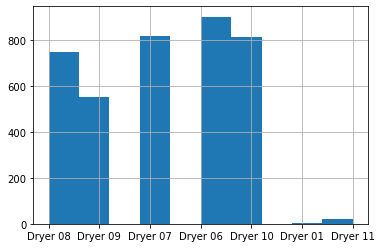

In [19]:
df_pa['Dryer'].hist()

In [20]:
df_pa.shape

(3859, 33)

In [21]:
df_nj.shape

(6591, 33)

In [22]:
df_product.shape

(9916, 15)

In [73]:
df_nj[df_nj['Dryer']=='Dryer 04']['ProdLine']

0       Fragrance
2       Fragrance
7       Fragrance
11      Fragrance
14      Fragrance
          ...    
6575    Fragrance
6577    Fragrance
6580    Fragrance
6582    Fragrance
6590    Fragrance
Name: ProdLine, Length: 1552, dtype: object

In [88]:
df_nj.loc[(df_nj['Dryer']=='Dryer 04')]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.7357,352.2000,105.5,2.4,5.1,0.0,...,33.85,1020,51,3.36,270,90,804,Clouds,overcast clouds,04d
2,2016-01-02 21:40:51.470,NJSD313826,10447-0000,Dryer 04,1353.0969,1195.9000,88.4,9.7,5.7,0.9,...,33.44,1016,87,3.36,170,1,800,Clear,sky is clear,01n
7,2016-01-03 10:20:41.000,NJSD313590,40080-0000,Dryer 04,5779.7773,4592.2999,79.5,52.4,5.1,8.3,...,43.92,1012,54,5.82,0,1,800,Clear,sky is clear,01d
11,2016-01-05 14:33:44.560,NJSD314063,40742-0000,Dryer 04,234.9988,190.6000,81.1,2.0,6.2,0.0,...,30.92,1036,21,4.70,0,1,800,Clear,sky is clear,01d
14,2016-01-06 21:28:06.777,NJSD314393,10339-0000,Dryer 04,767.3215,693.5000,90.4,5.3,5.8,0.1,...,32.18,1031,58,5.82,226,1,800,Clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,2020-12-23 04:00:41.257,NJSD379984,10283-0000,Dryer 04,927.1646,904.1000,97.5,4.4,3.1,0.6,...,37.42,1025,51,4.70,320,1,800,Clear,sky is clear,01n
6577,2020-12-23 12:33:36.800,NJSD379987,45051-0000,Dryer 04,904.6464,749.6000,82.9,5.7,4.3,0.4,...,44.01,1027,48,6.93,190,1,800,Clear,sky is clear,01d
6580,2020-12-23 19:20:28.000,NJSD377634,10577-0000,Dryer 04,584.2001,538.0000,92.1,2.3,4.3,0.7,...,39.20,1027,69,4.70,130,1,800,Clear,sky is clear,01n
6582,2020-12-26 13:24:41.390,NJSD378900,44042-0000,Dryer 04,12132.8300,10949.7997,90.2,88.9,5.7,8.2,...,32.00,1012,46,12.75,300,1,800,Clear,sky is clear,01d


# df_nj.loc[(df_nj['Dryer']=='Dryer 04') & (df_nj['ProdLine']=='Fragrance')]

In [77]:
df_nj[df_nj['Dryer']=='Dryer 04' and df_nj['ProdLine']=='Fragrance']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [82]:
(df_nj['Dryer']=='Dryer 04') and True

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [54]:
import seaborn as sns

In [137]:
df_pa[df_pa['Rate']>2000].iloc[:,0:13]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate
821,2017-05-31 14:55:09.420,PASD335907,40828-0000,Dryer 07,6079.9957,4958.9999,81.6,1.5,0.0,0.0,1.5,Nutraceutical,3305.999933
2983,2020-01-10 09:16:44.370,PASD366223,44939-0000,Dryer 06,1940.0480,2246.4999,115.8,0.3,0.1,0.0,0.4,Chemical,7488.333000
2999,2020-01-16 16:15:35.970,PASD366522,47645-0000,Dryer 06,8580.0000,8450.0000,98.5,0.6,0.1,0.0,0.7,Flavors,14083.333333


D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rate', ylabel='Density'>

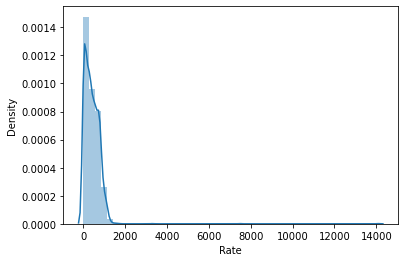

In [57]:
sns.distplot(df_pa['Rate'])

In [52]:
df_pa.columns

Index(['StartDate', 'BatchNumber', 'CustItem', 'Dryer', 'ScheduledDryQty',
       'ActualDryQty', 'YieldPercentage', 'DryingTime_Hrs', 'CleanTime_Hrs',
       'DownTime_Hrs', 'TotalRunTime_Hrs', 'ProdLine', 'Rate', 'dt_est', 'dt',
       'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [51]:
df_pa[df_pa['Dryer']=='Dryer 11']

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
3755,2020-11-23 14:54:57.157,PASD378984,41902-0000,Dryer 11,1842.4000,1580.0000,85.8,3.2,16.0,7.9,...,50.00,1016,45,17.22,310,40,802,Clouds,scattered clouds,03d
3762,2020-11-25 10:25:44.547,PASD379071,41902-0000,Dryer 11,2449.9902,2365.0000,96.5,1.9,16.0,0.0,...,48.99,1025,65,9.17,190,1,800,Clear,sky is clear,01d
3779,2020-12-01 11:46:38.000,PASD379109,23606-0000,Dryer 11,8087.6790,7500.0000,92.7,11.5,9.9,7.0,...,42.80,1000,80,14.99,250,90,804,Clouds,overcast clouds,04d
3781,2020-12-02 13:59:32.000,PASD377743,47567-0000,Dryer 11,46734.9188,44190.1988,94.6,52.0,11.9,12.5,...,43.00,1012,52,19.46,270,90,500,Rain,light rain,10d
3791,2020-12-06 04:49:11.240,PASD377437,23606-0000,Dryer 11,14608.8447,14500.0000,99.3,20.5,0.5,1.0,...,37.40,1008,64,13.87,300,90,804,Clouds,overcast clouds,04n
3794,2020-12-07 02:50:05.777,PASD377438,23606-0000,Dryer 11,14136.6204,13750.0000,97.3,18.5,0.3,6.5,...,28.99,1010,73,3.36,250,1,800,Clear,sky is clear,01n
3797,2020-12-08 05:03:10.167,PASD376168,23606-0000,Dryer 11,14397.0137,14000.0000,97.2,19.4,0.0,5.4,...,33.01,1004,71,16.11,340,90,804,Clouds,overcast clouds,04n
3799,2020-12-09 09:06:12.837,PASD376169,23606-0000,Dryer 11,14227.4523,14000.0000,98.4,19.0,0.1,2.0,...,33.80,1008,80,13.87,240,90,804,Clouds,overcast clouds,04d
3802,2020-12-10 07:38:10.247,PASD376172,23606-0000,Dryer 11,14693.6140,14500.0000,98.7,19.6,0.2,0.0,...,41.00,1012,69,9.17,290,40,802,Clouds,scattered clouds,03d
3805,2020-12-11 03:26:29.463,PASD376173,23606-0000,Dryer 11,14530.1443,14450.0000,99.4,19.5,0.1,0.0,...,28.99,1022,85,3.36,350,1,800,Clear,sky is clear,01n


In [44]:
df_nj.columns


Index(['StartDate', 'BatchNumber', 'CustItem', 'Dryer', 'ScheduledDryQty',
       'ActualDryQty', 'YieldPercentage', 'DryingTime_Hrs', 'CleanTime_Hrs',
       'DownTime_Hrs', 'TotalRunTime_Hrs', 'ProdLine', 'Rate', 'dt_est', 'dt',
       'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [47]:
df_nj[df_nj['Dryer']=='Dryer 09']['ProdLine']

4714    Food Additive
Name: ProdLine, dtype: object

In [45]:
df_nj[df_nj['Dryer']=='Dryer 06']['ProdLine']

5036    Flavors
Name: ProdLine, dtype: object

In [132]:
df_pa[df_pa['BatchNumber'].str.contains('PA')].loc[(df_pa['Dryer']=='Dryer 01')]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
925,2017-07-30 14:46:07.497,PASD337379,22529-0000,Dryer 01,1121.0564,978.0,87.2,9.5,0.0,0.0,...,82.94,1017,34,11.41,70,1,800,Clear,sky is clear,01d
1092,2017-10-23 16:28:24.000,PASD337014,13639-0000,Dryer 01,5628.9873,5200.0,92.4,13.4,2.4,4.3,...,73.40,1019,65,12.75,130,90,804,Clouds,overcast clouds,04d


In [131]:
df_nj[df_nj['BatchNumber'].str.contains('NJ')].loc[(df_nj['Dryer']=='Dryer 06') | (df_nj['Dryer']=='Dryer 09')]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
4714,2019-07-30 16:58:48.347,NJSD359853,46901-0000,Dryer 09,83.5002,64.2,81.9,6.7,0.0,2.5,...,95.0,1013,48,6.93,180,20,801,Clouds,few clouds,02d
5036,2019-10-22 01:48:33.257,NJSD362799,45230-0000,Dryer 06,4285.0555,4000.0,93.3,12.8,12.3,1.4,...,57.2,1019,89,6.17,99,90,804,Clouds,overcast clouds,04n


In [12]:
df_nj[df_nj['BatchNumber'].str.contains('NJ')

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.7357,352.2000,105.5,2.4,5.1,0.0,...,33.85,1020,51,3.36,270,90,804,Clouds,overcast clouds,04d
1,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.4120,3935.3999,92.2,8.4,0.2,4.2,...,38.28,1019,47,8.05,280,75,803,Clouds,broken clouds,04d
2,2016-01-02 21:40:51.470,NJSD313826,10447-0000,Dryer 04,1353.0969,1195.9000,88.4,9.7,5.7,0.9,...,33.44,1016,87,3.36,170,1,800,Clear,sky is clear,01n
3,2016-01-02 22:45:11.673,NJSD312677,24164-0000,Dryer 02,19549.0975,18185.1000,93.0,54.2,11.1,7.6,...,32.90,1016,84,3.36,190,1,800,Clear,sky is clear,01n
4,2016-01-03 00:10:32.910,NJSD314508,10558-0000,Dryer 03,4282.1720,3373.1999,78.8,8.2,0.1,3.5,...,32.90,1015,84,5.66,227,1,800,Clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10544,2020-12-27 02:02:32.617,NJSD378398,45723-0000,Dryer 01,1822.5465,1792.0000,98.3,6.2,4.6,0.8,...,25.65,1019,62,3.36,310,1,800,Clear,sky is clear,01n
10547,2020-12-27 14:47:34.140,NJSD378412,10093-0000,Dryer 01,1683.3335,1600.0000,95.0,4.9,3.4,0.4,...,39.20,1025,47,5.82,0,1,800,Clear,sky is clear,01d
10548,2020-12-27 16:29:14.457,NJSD379264,44097-0000,Dryer 02,6488.6985,6200.0000,95.6,11.6,3.4,6.5,...,37.99,1025,47,4.70,190,1,800,Clear,sky is clear,01d
10550,2020-12-28 06:35:56.627,NJSD378095,10247-0000,Dryer 03,19073.2326,18400.0000,96.5,90.9,5.8,12.7,...,39.99,1021,93,2.30,151,1,800,Clear,sky is clear,01n


In [8]:
df_nj

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.7357,352.2000,105.5,2.4,5.1,0.0,...,33.85,1020,51,3.36,270,90,804,Clouds,overcast clouds,04d
1,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.4120,3935.3999,92.2,8.4,0.2,4.2,...,38.28,1019,47,8.05,280,75,803,Clouds,broken clouds,04d
2,2016-01-02 21:40:51.470,NJSD313826,10447-0000,Dryer 04,1353.0969,1195.9000,88.4,9.7,5.7,0.9,...,33.44,1016,87,3.36,170,1,800,Clear,sky is clear,01n
3,2016-01-02 22:45:11.673,NJSD312677,24164-0000,Dryer 02,19549.0975,18185.1000,93.0,54.2,11.1,7.6,...,32.90,1016,84,3.36,190,1,800,Clear,sky is clear,01n
4,2016-01-03 00:10:32.910,NJSD314508,10558-0000,Dryer 03,4282.1720,3373.1999,78.8,8.2,0.1,3.5,...,32.90,1015,84,5.66,227,1,800,Clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10551,2020-12-28 09:04:23.930,PASD372294,48025-0000,Dryer 10,21762.1510,19650.0000,90.3,35.1,14.2,17.7,...,44.54,1021,75,5.21,218,75,803,Clouds,broken clouds,04d
10552,2020-12-29 12:28:05.080,PASD380104,41902-0000,Dryer 07,490.0008,300.0000,61.2,2.1,0.6,1.5,...,39.20,1029,29,14.99,320,20,801,Clouds,few clouds,02d
10553,2020-12-29 21:33:47.500,PASD377869,43041-0000,Dryer 07,21684.3832,20360.0000,93.9,31.2,13.6,2.9,...,32.00,1033,46,5.82,350,1,800,Clear,sky is clear,01n
10554,2020-12-30 15:26:38.750,PASD376163,14957-0000,Dryer 11,47045.5404,45402.3987,96.5,50.4,0.0,7.2,...,43.00,1024,44,6.93,190,1,800,Clear,sky is clear,01d


In [486]:
df_multi.head(7)

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours,hour_add
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3,0 days 00:00:00
1,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 10:00:00-05:00,3,0 days 01:00:00
2,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 11:00:00-05:00,3,0 days 02:00:00
3,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 11:00:00-05:00,9,0 days 00:00:00
4,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,0 days 01:00:00
5,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 13:00:00-05:00,9,0 days 02:00:00
6,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 14:00:00-05:00,9,0 days 03:00:00


In [487]:
df_nj_weather.shape

(46646, 20)

In [485]:
df_multi.shape

(220787, 16)

In [473]:
df_nj.head(2)

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.7357,352.2000,105.5,2.4,5.1,0.0,...,33.85,1020,51,3.36,270,90,804,Clouds,overcast clouds,04d
1,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.4120,3935.3999,92.2,8.4,0.2,4.2,...,38.28,1019,47,8.05,280,75,803,Clouds,broken clouds,04d


In [334]:
df_product.shape

(9916, 14)

In [336]:
df_product.columns

Index(['StartDate', 'BatchNumber', 'CustItem', 'Dryer', 'ScheduledDryQty',
       'ActualDryQty', 'YieldPercentage', 'DryingTime_Hrs', 'CleanTime_Hrs',
       'DownTime_Hrs', 'TotalRunTime_Hrs', 'ProdLine', 'Rate', 'dt_est'],
      dtype='object')

In [337]:
df_product['dt_est']

0      2016-01-02 09:00:00-05:00
1      2016-01-02 11:00:00-05:00
2      2016-01-02 22:00:00-05:00
3      2016-01-02 23:00:00-05:00
4      2016-01-03 00:00:00-05:00
                  ...           
9965   2020-12-28 09:00:00-05:00
9966   2020-12-29 12:00:00-05:00
9967   2020-12-29 22:00:00-05:00
9968   2020-12-30 15:00:00-05:00
9969   2020-12-30 21:00:00-05:00
Name: dt_est, Length: 9916, dtype: datetime64[ns, America/New_York]

In [339]:
df_product.iloc[0,:]

StartDate             2016-01-02 08:54:58.000
BatchNumber                        NJSD313825
CustItem                           10013-0000
Dryer                                Dryer 04
ScheduledDryQty                       333.736
ActualDryQty                            352.2
YieldPercentage                         105.5
DryingTime_Hrs                            2.4
CleanTime_Hrs                             5.1
DownTime_Hrs                                0
TotalRunTime_Hrs                          7.5
ProdLine                            Fragrance
Rate                                   146.75
dt_est              2016-01-02 09:00:00-05:00
Name: 0, dtype: object

In [344]:
type(df_product.loc[0, 'TotalRunTime_Hrs'])

numpy.float64

In [345]:
float_10 = df_product.loc[0, 'TotalRunTime_Hrs']

In [346]:
df_20 = df_product.copy()

In [349]:
df_20.head(2)

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.7357,352.2000,105.5,2.4,5.1,0.0,7.5,Fragrance,146.750000,2016-01-02 09:00:00-05:00
1,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.4120,3935.3999,92.2,8.4,0.2,4.2,12.8,Fragrance,468.499988,2016-01-02 11:00:00-05:00


In [380]:
def row_proliferate(int):
    """
    """
    for n in range(int):
        
#         print(n)
    
#     print(int)
    

In [372]:
df_20['hours'] = np.ceil(df_20['DryingTime_Hrs']).astype(int)

df_20['hours'].apply(row_proliferate)

In [450]:
df_21.head(7)

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
1,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
2,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
3,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9
4,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9
5,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9
6,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9


In [467]:
# for index, m in df_20.iterrows():
#     print(index)
#     print('\n')
#     print(m['hours'])
#     print(type(m['dt_est']))
#     s_10 = pd.DataFrame(m.repeat(m['hours']))
#     print(s_10)
#     break

In [409]:
df_20.shape

(9916, 15)

In [413]:
df_21 = pd.DataFrame(np.repeat(df_20.values,df_20['hours'],axis=0), columns = df_20.columns)

In [465]:
df_21['hours_add'] = df_21.groupby(['StartDate'])['hours'].apply(lambda x: x.cumsum()/x.count()) - 1

In [466]:
df_21.iloc[3:14]

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours,hours_add
3,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,0
4,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,1
5,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,2
6,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,3
7,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,4
8,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,5
9,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,6
10,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,7
11,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9,8
12,2016-01-02 21:40:51.470,NJSD313826,10447-0000,Dryer 04,1353.1,1195.9,88.4,9.7,5.7,0.9,16.2,Fragrance,123.289,2016-01-02 23:00:00-05:00,10,0


In [481]:
df_product['hours'] = np.ceil(df_product['DryingTime_Hrs']).astype(int)
# Second, repeat each records/rows by ['hours'] times
# which means you will have how many running hours, you will have how many rows for each column
df_multi = pd.DataFrame(np.repeat(df_product.values, df_product['hours'], axis=0),
                              columns = df_product.columns)
# Thrid, adjust ['hours'] to ascending rank model, for instance, [3,3,3] to [0,1,2]
# this is used for next step add to ['dt_est'] time
# groupby each old record, for instance, for first records, groupby will be a three row table
# for second records, groupby['StartData'] will be a nine row table
# Then, extract ['hours'] column, for each pd.Series, apply a fomulation
# addition, in here, ['hours'] will not be a single row, instead, it will be a three element Series
# for this three/nine series, we cacualte their cumulation sum cumsum() [3,3,3] will be [3,6,9]
# for instance [9.9.9.9...9] will be [9,18,27,,,,81]
# and we divide by ['hours'] count, which will be [3,9,...], last minute 1 to get a column for timestamp add
df_multi['hour_add'] = df_multi.groupby(['StartDate'])['hours'].apply(lambda x:x.cumsum()/x.count())-1
# our weather segmentation is one hour
# one_hour = datetime.timedelta(hours = 1)
df_multi['hour_add'].apply(convert_timedelta)
df_multi['dt_est'] = df_multi['dt_est'] + df_multi['hour_add']

D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\pandas\core\arrays\datetimelike.py:1342: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

In [482]:
df_multi['hour_add'].apply

0          0
1          1
2          2
3          0
4          1
          ..
220782    50
220783     0
220784     1
220785     2
220786     3
Name: hour_add, Length: 220787, dtype: object

In [476]:
def date_time(series):
    date_time = datetime.timedelta(hours = series)
    return date_time

In [478]:
def convert_timedelta(element):
    """:arg
    """
    time_delta = datetime.timedelta(hours = element)
    return time_delta

In [479]:
df_21['hours_add'].apply(convert_timedelta)

0        0 days 00:00:00
1        0 days 01:00:00
2        0 days 02:00:00
3        0 days 00:00:00
4        0 days 01:00:00
               ...      
220782   2 days 02:00:00
220783   0 days 00:00:00
220784   0 days 01:00:00
220785   0 days 02:00:00
220786   0 days 03:00:00
Name: hours_add, Length: 220787, dtype: timedelta64[ns]

In [455]:
for idx, tab in df_21.groupby(['StartDate']):
    idx, tab
    break

In [459]:
tab['hours'].count()

3

In [414]:
df_21.head(7)

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
1,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
2,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
3,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 11:00:00-05:00,9
4,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 11:00:00-05:00,9
5,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 11:00:00-05:00,9
6,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 11:00:00-05:00,9


In [449]:
# too too too slow

# one_hour = hours_added = datetime.timedelta(hours = 1)
# old_time = df_21.iloc[0,0]
# for index, rows in df_21.iterrows():
# #     print(old_time)
#     new_time = df_21.iloc[index,0]
# #     print(new_time)
#     if old_time==new_time:
# #         print('Equal')
#         pass
#     else:
# #         print(rows['dt_est'])
#         df_21.loc[index,'dt_est'] = rows['dt_est'] + one_hour
# #         print(rows['dt_est'])
#         old_time = df_21.loc[index,'dt_est']
    

In [448]:
df_21.head(6)

,StartDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,Rate,dt_est,hours
0,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
1,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
2,2016-01-02 08:54:58.000,NJSD313825,10013-0000,Dryer 04,333.736,352.2,105.5,2.4,5.1,0,7.5,Fragrance,146.75,2016-01-02 09:00:00-05:00,3
3,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9
4,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9
5,2016-01-02 11:06:57.863,NJSD312807,10558-0000,Dryer 03,4270.41,3935.4,92.2,8.4,0.2,4.2,12.8,Fragrance,468.5,2016-01-02 12:00:00-05:00,9


In [422]:
def test(row):
    print(row[0])

df_21.apply(test, axis=1)

In [441]:
df_21.loc[index,'dt_est'] 

Timestamp('2016-01-02 09:00:00-0500', tz='America/New_York')

In [415]:
df_21.shape

(220787, 15)

In [368]:
hours = np.ceil(df_20['DryingTime_Hrs']).astype(int)

In [395]:
df_20['dt_est'][0]

Timestamp('2016-01-02 09:00:00-0500', tz='America/New_York')

In [397]:
import datetime

In [399]:
hours_added = datetime.timedelta(hours = 3)

In [400]:
hours_added

datetime.timedelta(seconds=10800)

In [402]:
future_date_and_time = df_20['dt_est'][0] + hours_added

In [403]:
future_date_and_time

Timestamp('2016-01-02 12:00:00-0500', tz='America/New_York')

In [354]:
for x in range(int(8.0)):
    print(x)

0
1
2
3
4
5
6
7


In [212]:
# solve statistical problem
from scipy import stats
import seaborn as sns

In [312]:
df_product.isnull().sum()

StartDate           0
BatchNumber         0
CustItem            0
Dryer               0
ScheduledDryQty     0
ActualDryQty        0
YieldPercentage     0
DryingTime_Hrs      0
CleanTime_Hrs       0
DownTime_Hrs        0
TotalRunTime_Hrs    0
ProdLine            0
Rate                0
dt_est              0
dtype: int64

In [323]:
df_nj_weather.shape

(46646, 26)

In [314]:
df_nj_weather.isnull().sum()

dt                         0
dt_iso                     0
timezone                   0
city_name                  0
lat                        0
lon                        0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              46646
grnd_level             46646
humidity                   0
wind_speed                 0
wind_deg                   0
rain_1h                40028
rain_3h                45966
snow_1h                45779
snow_3h                46561
clouds_all                 0
weather_id                 0
weather_main               0
weather_description        0
weather_icon               0
dt_est                     0
dtype: int64

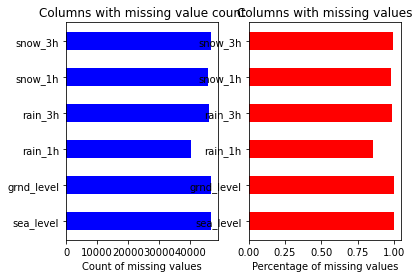

['sea_level', 'grnd_level', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h'] <class 'list'>


In [316]:
class_eda = EDA()
list_missing_nj = class_eda.missing_plot(df_nj_weather)

In [321]:
# class_preprocess = PreProcess()
# df_20, df_drop_21 = class_preprocess.drop_na(df_nj_weather, list_missing_nj)

In [325]:
df_20 = df_nj_weather.drop(list_missing_nj, axis=1)

In [326]:
df_20.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon', 'dt_est'],
      dtype='object')

In [328]:
df_nj_weather.shape

(46646, 26)

In [327]:
df_20.shape

(46646, 20)

In [322]:
list_missing_nj

['sea_level', 'grnd_level', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']